#Prequisites
In this exercise we use R and Python for data simulation and processing. Please install Python and scikit-learn for this exercise.

Enable in-line plotting for notebooks
%matplotlib inline

## Data

For this exercise we simulate Single Cell RNA sequence data using [Splatter package in R](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1305-0) which is publically available. 

First, one need to start `rmagic` by executing this in a cell:

%load_ext rpy2.ipython

Then, use `%%R` to execute cell magic. Use this if you want all syntax in a cell to be executed in R. Note that this must be placed at the beginning of the cell.

In [1]:
%load_ext rpy2.ipython

D:\Programming\BKIM\venv\lib\site-packages\rpy2\robjects\packages.py:368: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


install bioconductor.
This may take some time!

In [2]:
%%R
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.16")

R[write to console]: Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 (2022-10-31 ucrt)

R[write to console]: Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 (2022-10-31 ucrt)

R[write to console]: Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.2.2/library
  packages:
    Matrix

R[write to console]: Old packages: 'DelayedArray', 'GenomeInfoDb', 'GenomicRanges', 'scater'



Update all/some/none? [a/s/n]: Update all/some/none? [a/s/n]: Update all/some/none? [a/s/n]: 
  There are binary versions available but the source versions are later:
              binary source needs_compilation
DelayedArray  0.23.2 0.24.0              TRUE
GenomicRanges 1.49.0 1.50.1              TRUE

  Binaries will be installed


R[write to console]: trying URL 'https://bioconductor.org/packages/3.16/bioc/bin/windows/contrib/4.2/DelayedArray_0.23.2.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 2449113 bytes (2.3 MB)

R[write to console]: downloaded 2.3 MB


R[write to console]: trying URL 'https://bioconductor.org/packages/3.16/bioc/bin/windows/contrib/4.2/GenomeInfoDb_1.34.3.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 4150366 bytes (4.0 MB)

R[write to console]: downloaded 4.0 MB


R[write to console]: trying URL 'https://bioconductor.org/packages/3.16/bioc/bin/windows/contrib/4.2/GenomicRanges_1.49.0.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 2106331 bytes (2.0 MB)

R[write to console]: downloaded 2.0 MB


R[write to console]: trying URL 'https://bioconductor.org/packages/3.16/bioc/bin/windows/contrib/4.2/scater_1.26.1.zip'

R[write to console]: Content type 'application/zip'
R[write

package 'DelayedArray' successfully unpacked and MD5 sums checked
package 'GenomeInfoDb' successfully unpacked and MD5 sums checked
package 'GenomicRanges' successfully unpacked and MD5 sums checked
package 'scater' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\iwish\AppData\Local\Temp\RtmpYPlcIT\downloaded_packages


install splatter

In [3]:
%%R
BiocManager::install("splatter", verbose=FALSE)

R[write to console]: Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 (2022-10-31 ucrt)

R[write to console]: Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.2.2/library
  packages:
    Matrix

R[write to console]: Old packages: 'DelayedArray', 'GenomicRanges'



Update all/some/none? [a/s/n]: Update all/some/none? [a/s/n]: 
  There are binary versions available but the source versions are later:
              binary source needs_compilation
DelayedArray  0.23.2 0.24.0              TRUE
GenomicRanges 1.49.0 1.50.1              TRUE

  Binaries will be installed


R[write to console]: trying URL 'https://bioconductor.org/packages/3.16/bioc/bin/windows/contrib/4.2/DelayedArray_0.23.2.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 2449113 bytes (2.3 MB)

R[write to console]: downloaded 2.3 MB


R[write to console]: trying URL 'https://bioconductor.org/packages/3.16/bioc/bin/windows/contrib/4.2/GenomicRanges_1.49.0.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 2106331 bytes (2.0 MB)

R[write to console]: downloaded 2.0 MB




package 'DelayedArray' successfully unpacked and MD5 sums checked
package 'GenomicRanges' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\iwish\AppData\Local\Temp\RtmpYPlcIT\downloaded_packages


## 1) Simulate 5000 samples with 2000 genes with following parameters
### 1.1) Simulate samples from two different groups (cell types) with mean of 0.6 and drop out probability of 0.3 and 0.6

In [4]:
%%R
suppressPackageStartupMessages({
  library(splatter)
  library(scater)
})

In [5]:
%%R
params <- newSplatParams()
params <- setParam(params, "nGenes", 2000)
params <- setParam(params, "mean.rate", 0.6)
params <- setParam(params, "dropout.type", "experiment")
params <- setParam(params, "dropout.mid", 0.3)

sim <- splatSimulate(params)
params

R[write to console]: Getting parameters...

R[write to console]: Creating simulation object...

R[write to console]: Simulating library sizes...

R[write to console]: Simulating gene means...

R[write to console]: Simulating BCV...

R[write to console]: Simulating counts...

R[write to console]: Simulating dropout (if needed)...

R[write to console]: Sparsifying assays...

R[write to console]: Automatically converting to sparse matrices, threshold = 0.95

R[write to console]: Skipping 'BatchCellMeans': estimated sparse size 1.5 * dense matrix

R[write to console]: Skipping 'BaseCellMeans': estimated sparse size 1.5 * dense matrix

R[write to console]: Skipping 'BCV': estimated sparse size 1.5 * dense matrix

R[write to console]: Skipping 'CellMeans': estimated sparse size 1.49 * dense matrix

R[write to console]: Skipping 'TrueCounts': estimated sparse size 2.39 * dense matrix

R[write to console]: Skipping 'DropProb': estimated sparse size 1.5 * dense matrix

R[write to console]: Conv

A Params object of class SplatParams 
Parameters can be (estimable) or [not estimable], 'Default' or  'NOT DEFAULT' 
Secondary parameters are usually set during simulation

Global: 
(GENES)  (Cells)   [SEED] 
   2000      100   749498 

29 additional parameters 

Batches: 
    [Batches]  [Batch Cells]     [Location]        [Scale]       [Remove] 
            1            100            0.1            0.1          FALSE 

Mean: 
 (RATE)  (Shape) 
    0.6      0.6 

Library size: 
(Location)     (Scale)      (Norm) 
        11         0.2       FALSE 

Exprs outliers: 
(Probability)     (Location)        (Scale) 
         0.05              4            0.5 

Groups: 
     [Groups]  [Group Probs] 
            1              1 

Diff expr: 
[Probability]    [Down Prob]     [Location]        [Scale] 
          0.1            0.5            0.1            0.4 

BCV: 
(Common Disp)          (DoF) 
          0.1             60 

Dropout: 
    [TYPE]  (MIDPOINT)     (Shape) 
experiment         

In [6]:
%%R
write.table(counts(sim), "sim.txt")

### 1.2) Plot heatmap of the normalized samples with different dropout rates to depict the dropout effect.

In [7]:
import pandas as pd

sim = pd.read_table("sim.txt", sep=" ")
sim

,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Cell9,Cell10,...,Cell91,Cell92,Cell93,Cell94,Cell95,Cell96,Cell97,Cell98,Cell99,Cell100
Gene1,24,8,10,15,23,18,10,7,20,17,...,13,22,12,36,20,9,17,28,22,47
Gene2,43,19,51,19,18,40,34,27,38,16,...,43,29,20,12,30,38,47,34,30,54
Gene3,168,97,147,86,73,101,73,58,105,84,...,140,142,109,153,101,117,104,126,178,110
Gene4,7,1,0,0,0,0,0,0,0,2,...,0,2,0,1,0,0,0,5,0,0
Gene5,0,0,8,0,2,0,4,1,11,2,...,0,0,14,8,6,1,4,3,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gene1996,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,5,1,0,0,0,2
Gene1997,0,7,0,0,6,0,0,2,5,0,...,0,0,0,4,1,0,2,2,0,0
Gene1998,0,0,0,0,0,0,0,0,3,0,...,0,0,1,1,3,0,3,0,0,4
Gene1999,7,9,10,0,0,5,6,10,8,5,...,14,2,18,7,5,6,16,9,16,12


In [8]:
!pip install seaborn

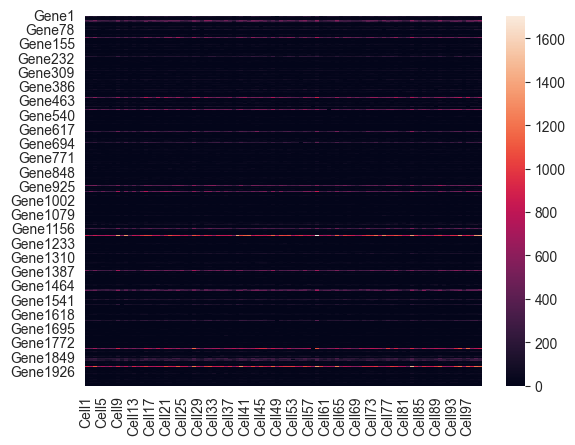

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(sim)
plt.show()

### 1.3) Simulate and illustrates tSNE visualization of simulated scRNA-seq data with six cell types with the same mean and dropout rates as before.

## 2) Normalization

### 2.1) Apply log transform on the simulated data and plot the heatmap

In [10]:
!pip install scipy

In [11]:
import numpy as np
from scipy.stats import zscore

D:\Programming\BKIM\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


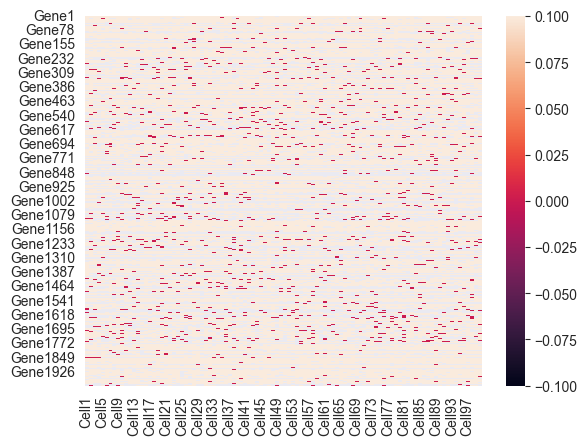

In [12]:
log_sim = sim.transform(lambda x: np.log2(x))
sns.heatmap(log_sim)
plt.show()

### 2.2) Normalize the simulated data using z-score and plot the heatmap

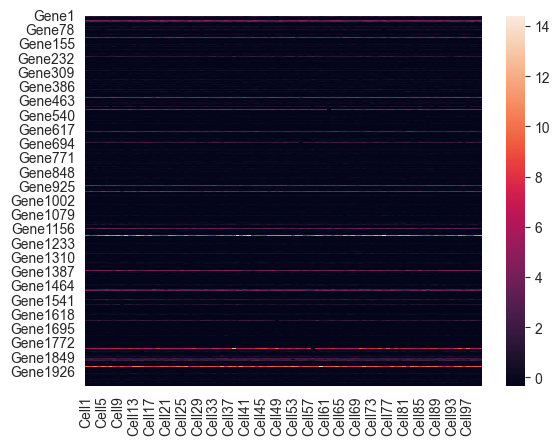

In [13]:
zscore_sim = zscore(sim)
sns.heatmap(zscore_sim)
plt.show()

## 3) Dimension reduction
### 3.1) Use PCA to reduce the data that was simulated in exercise 2) into two dimensions.

In [14]:
%%R
sim <- logNormCounts(sim)
sim <- runPCA(sim)

R[write to console]: Warning in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE,  :
R[write to console]: 
 
R[write to console]:  You're computing too large a percentage of total singular values, use a standard svd instead.



### 3.2) Plot the data in two dimensions with different colors for dataset a and b.

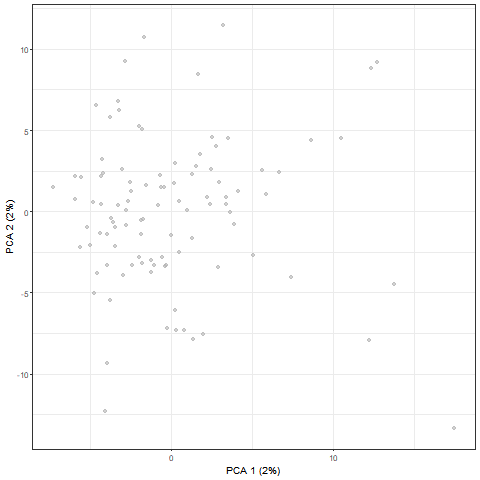

In [15]:
%%R
plotPCA(sim)

## 4) Batch effect
### 4.1) Simulate data with batch effect and plot the PCA dimensionality reduction (in two dimensions). Use following parameters:
1. three groups with 1000,1500, 2500 samples
2. from two cell type with frequency of 60% and 40%. 

you can use default values for the rest of parameters.

In [22]:
%%R
params <- newSplatParams()
params <- setParam(params, "batchCells", c(1000, 1500, 2500))
params <- setParam(params, "group.prob", c(0.6, 0.4))
sim <- splatSimulate(params)
params

R[write to console]: Getting parameters...

R[write to console]: Creating simulation object...

R[write to console]: Simulating library sizes...

R[write to console]: Simulating gene means...

R[write to console]: Simulating batch effects...

R[write to console]: Simulating BCV...

R[write to console]: Simulating counts...

R[write to console]: Simulating dropout (if needed)...

R[write to console]: Sparsifying assays...

R[write to console]: Automatically converting to sparse matrices, threshold = 0.95

R[write to console]: Skipping 'BatchCellMeans': estimated sparse size 1.5 * dense matrix

R[write to console]: Skipping 'BaseCellMeans': estimated sparse size 1.5 * dense matrix

R[write to console]: Skipping 'BCV': estimated sparse size 1.5 * dense matrix

R[write to console]: Skipping 'CellMeans': estimated sparse size 1.49 * dense matrix

R[write to console]: Skipping 'TrueCounts': estimated sparse size 1.65 * dense matrix

R[write to console]: Skipping 'counts': estimated sparse si

A Params object of class SplatParams 
Parameters can be (estimable) or [not estimable], 'Default' or  'NOT DEFAULT' 
Secondary parameters are usually set during simulation

Global: 
(Genes)  (CELLS)   [SEED] 
  10000     5000   280036 

29 additional parameters 

Batches: 
       [BATCHES]     [BATCH CELLS]        [Location]           [Scale] 
               3  1000, 1500, 2500               0.1               0.1 
        [Remove] 
           FALSE 

Mean: 
 (Rate)  (Shape) 
    0.3      0.6 

Library size: 
(Location)     (Scale)      (Norm) 
        11         0.2       FALSE 

Exprs outliers: 
(Probability)     (Location)        (Scale) 
         0.05              4            0.5 

Groups: 
     [GROUPS]  [GROUP PROBS] 
            2       0.6, 0.4 

Diff expr: 
[Probability]    [Down Prob]     [Location]        [Scale] 
          0.1            0.5            0.1            0.4 

BCV: 
(Common Disp)          (DoF) 
          0.1             60 

Dropout: 
    [Type]  (Midpoint)   

SyntaxError: invalid syntax (1386254815.py, line 3)

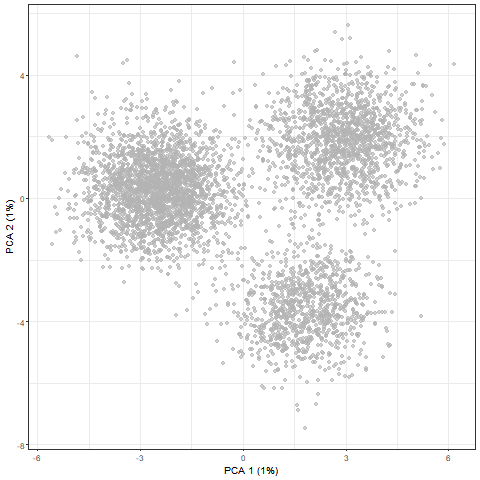

R[write to console]: Warning in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE,  :
R[write to console]: 
 
R[write to console]:  You're computing too large a percentage of total singular values, use a standard svd instead.



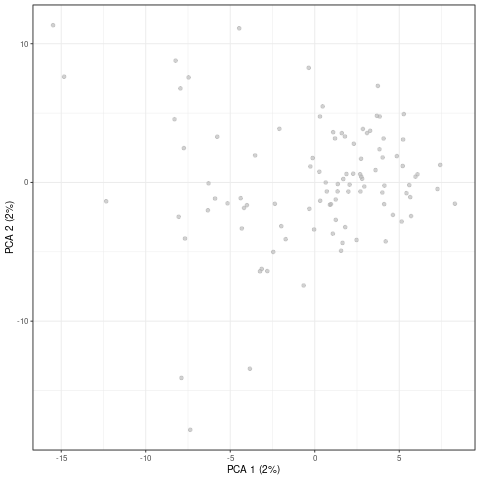

In [38]:
%%R
sim <- logNormCounts(sim)
sim <- runPCA(sim)
plotPCA(sim)